In [1]:
import pandas as pd

import config

In [2]:
config.REPO_ROOT

PosixPath('/home/users/skell/uor-msc-dissertation-xai-african-storms')

In [3]:
df = pd.read_csv(config.DATA_DIR / "East_Africa_tracked_MCSs_2014_2019_longer_than_3_hours.csv")
df.head()

,Storm,Life,Area,Initial UTC,Lon,Lat,Parent,Child,Accreted,u,...,LonInBounds,LatInBounds,in_domain,areaxgpm_mean,duration,duration_hr,speed,mean_speed,east_africa_time,eat_hours
0,3992,13,25,2014-01-02 14:15:00,38.900739,6.77762,[-999],[-999],[-999],0.15,...,True,True,True,NaN,0 days 03:15:00,3.25,2.134379,4.309462,2014-01-02 17:15:00,17.25
1,3992,13,40,2014-01-02 14:15:00,38.854092,6.77762,[-999],[-999],[-999],0.03,...,True,True,True,69.239998,0 days 03:15:00,3.25,4.353582,4.309462,2014-01-02 17:30:00,17.50
2,3992,13,52,2014-01-02 14:15:00,38.854092,6.77762,[-999],[-999],[-999],0.04,...,True,True,True,61.460004,0 days 03:15:00,3.25,0.901467,4.309462,2014-01-02 17:45:00,17.75
3,3992,13,68,2014-01-02 14:15:00,38.854092,6.77762,[-999],[-999],[-999],-1.03,...,True,True,True,NaN,0 days 03:15:00,3.25,7.018408,4.309462,2014-01-02 18:00:00,18.00
4,3992,13,81,2014-01-02 14:15:00,38.806765,6.74383,[-999],[-999],[-999],-0.54,...,True,True,True,NaN,0 days 03:15:00,3.25,3.344515,4.309462,2014-01-02 18:15:00,18.25


In [4]:
storm_inits = df.groupby("Storm").first()

/home/users/skell/.conda/envs/uor-msc-dissertation-xai-african-storms/lib/python3.13/site-packages/cartopy/mpl/feature_artist.py:144: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '


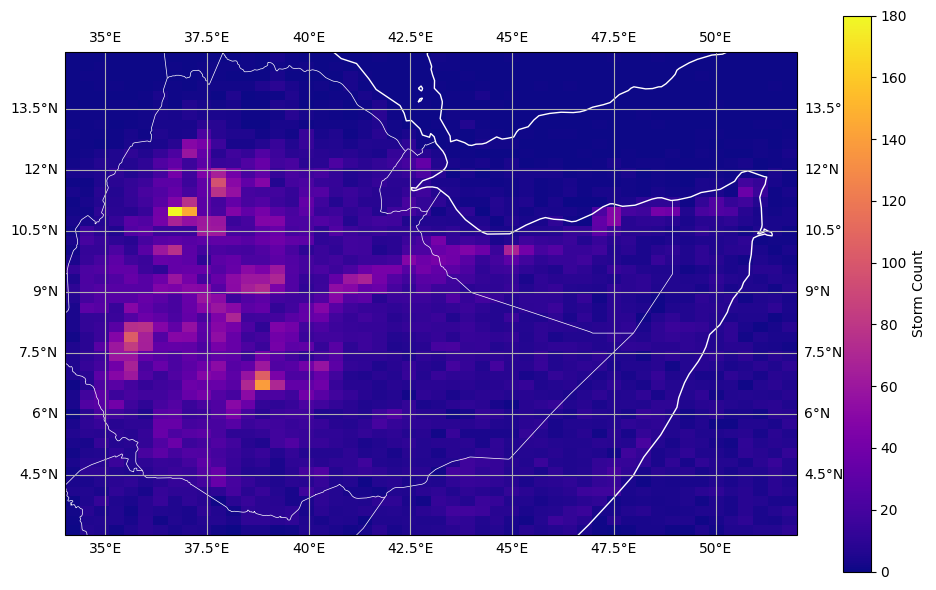

In [5]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cf

plt.figure(figsize=(10, 6))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines(resolution='50m', color='white', linewidth=1)
ax.add_feature(cf.BORDERS, color='white', linewidth=0.5)
ax.gridlines(draw_labels=True)
# https://www.julienphalip.com/blog/drawing-geographical-density-maps-with-matplotlib/
plt.hist2d(storm_inits["Lon"], storm_inits["Lat"], bins=50, cmap='plasma')
plt.colorbar(label='Storm Count')
plt.tight_layout()
plt.savefig(config.FIGURES_DIR/"storm_init_hist2d.png")
plt.show()

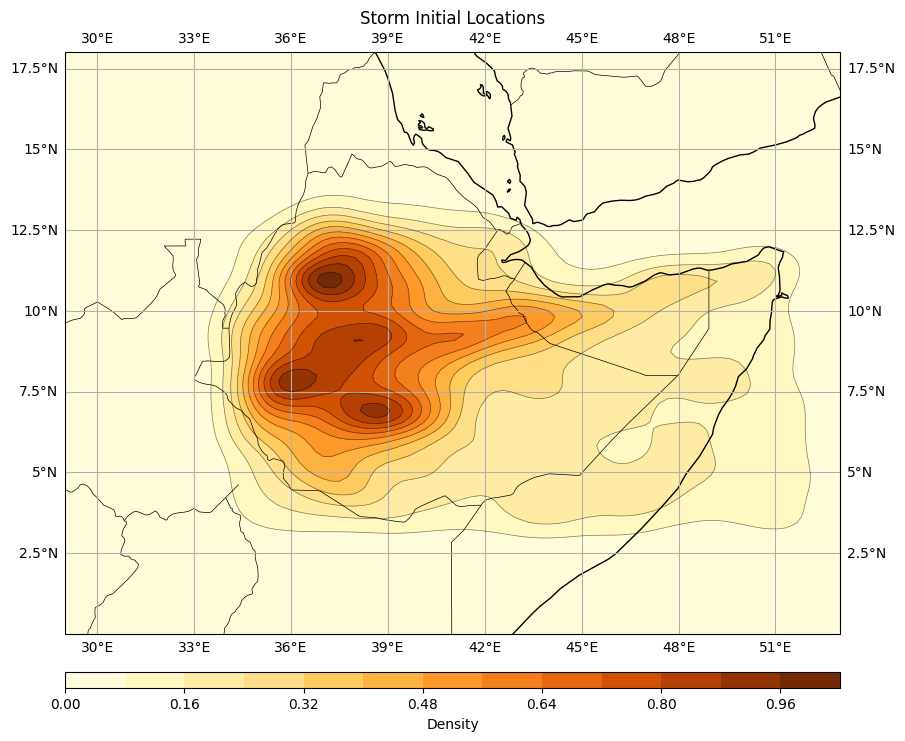

In [6]:
import numpy as np
from scipy.stats import gaussian_kde

# 2D kernel density estimation
xy = np.vstack([storm_inits["Lon"], storm_inits["Lat"]])
kde = gaussian_kde(xy)
xmin, xmax = config.MAP_AREA_EXTENT[0], config.MAP_AREA_EXTENT[1]
ymin, ymax = config.MAP_AREA_EXTENT[2], config.MAP_AREA_EXTENT[3]
X, Y = np.mgrid[xmin:xmax:100j, ymin:ymax:100j]
positions = np.vstack([X.ravel(), Y.ravel()])
Z = np.reshape(kde(positions).T, X.shape)

# normalize Z for consistent color scaling
Z /= Z.max()

# setup plot of east africa
plt.figure(figsize=(10, 10))
ax = plt.axes(projection=ccrs.PlateCarree())
# ax.set_extent(config.MAP_AREA_EXTENT, crs=ccrs.PlateCarree())
ax.coastlines(resolution='50m', color='black', linewidth=1)
ax.add_feature(cf.BORDERS, linewidth=0.5)
ax.gridlines(draw_labels=True)

# add filled contours and contour lines
ctf = ax.contourf(X, Y, Z, levels=15, cmap="YlOrBr")
ax.contour(X, Y, Z, levels=15, colors='k', linewidths=0.5, alpha=0.5)
cbar = plt.colorbar(ctf, ax=ax, orientation='horizontal', pad=0.05, aspect=50)
cbar.set_label("Density")

# Styling
ax.set_title("Storm Initial Locations")
plt.savefig(config.FIGURES_DIR/"storm_init_kde.png")
plt.show()

In [7]:
df.columns

Index(['Storm', 'Life', 'Area', 'Initial UTC', 'Lon', 'Lat', 'Parent', 'Child',
       'Accreted', 'u', 'v', 'in_gha', 'gpm_mean', 'gpm_max', 'gpm_frac',
       'gpm_perc90', 'Min BT', 'Mean BT', 'Final UTC', 'timestamp',
       'mjo_amplitude', 'mjo_phase', 'rmm1', 'rmm2', 'lst', 'u_ms', 'v_ms',
       'LonInBounds', 'LatInBounds', 'in_domain', 'areaxgpm_mean', 'duration',
       'duration_hr', 'speed', 'mean_speed', 'east_africa_time', 'eat_hours'],
      dtype='object')

In [8]:
df.head()

,Storm,Life,Area,Initial UTC,Lon,Lat,Parent,Child,Accreted,u,...,LonInBounds,LatInBounds,in_domain,areaxgpm_mean,duration,duration_hr,speed,mean_speed,east_africa_time,eat_hours
0,3992,13,25,2014-01-02 14:15:00,38.900739,6.77762,[-999],[-999],[-999],0.15,...,True,True,True,NaN,0 days 03:15:00,3.25,2.134379,4.309462,2014-01-02 17:15:00,17.25
1,3992,13,40,2014-01-02 14:15:00,38.854092,6.77762,[-999],[-999],[-999],0.03,...,True,True,True,69.239998,0 days 03:15:00,3.25,4.353582,4.309462,2014-01-02 17:30:00,17.50
2,3992,13,52,2014-01-02 14:15:00,38.854092,6.77762,[-999],[-999],[-999],0.04,...,True,True,True,61.460004,0 days 03:15:00,3.25,0.901467,4.309462,2014-01-02 17:45:00,17.75
3,3992,13,68,2014-01-02 14:15:00,38.854092,6.77762,[-999],[-999],[-999],-1.03,...,True,True,True,NaN,0 days 03:15:00,3.25,7.018408,4.309462,2014-01-02 18:00:00,18.00
4,3992,13,81,2014-01-02 14:15:00,38.806765,6.74383,[-999],[-999],[-999],-0.54,...,True,True,True,NaN,0 days 03:15:00,3.25,3.344515,4.309462,2014-01-02 18:15:00,18.25


In [9]:
storm_groups = df.sort_values(['Initial UTC']).groupby("Storm")

In [10]:
from utils import plotting

In [13]:
from importlib import reload
reload(plotting)

<module 'utils.plotting' from '/home/users/skell/uor-msc-dissertation-xai-african-storms/src/utils/plotting.py'>

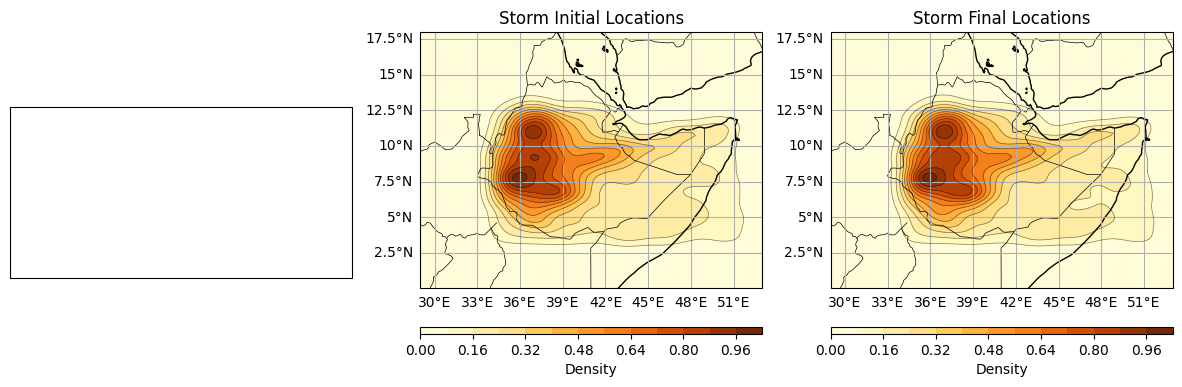

In [14]:
# create three subplots in one row
fig, axs = plt.subplots(1, 3, figsize=(15, 5), subplot_kw={'projection': ccrs.PlateCarree()})

# Define the extent for the map
storm_inits = storm_groups.first()
plotting.plot_kde_map(storm_inits["Lon"], storm_inits["Lat"], ax=axs[1], title="Storm Initial Locations")

storm_ends = storm_groups.last()
plotting.plot_kde_map(storm_ends["Lon"], storm_ends["Lat"], ax=axs[2], title="Storm Final Locations")